In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

savefig=False

if savefig and (not os.path.exists('assets')):
    os.makedirs('assets')

We consider the matrix arising from discretizing the heat equation. We consider the Dirichlet boundary condition with $u(t, 0)= u(t,1) = 0$. This notebook tries to explore the matrix $\boldsymbol{A}$ to iteratively evolve the heat equations, namely, the state vector at time $\{t_n\}_{n=0, 1, 2, \cdots}$ is evolving according to $$\boldsymbol{u}^{n+1} = \boldsymbol{A} \boldsymbol{u}^n$$ where $\boldsymbol{u}^n$ is a vector whose elements are spposed to approximate $\{u(t_n, x_j)\}_{j=1, 2, \cdots, N}$.

In [2]:
def matA_explicit(N, c):
    # return the matrix A for explicit scheme in time
    # N: grid size
    # c: CFL number
    
    A = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            if j == i - 1:
                A[i,j] = c
            elif j == i + 1:
                A[i,j] = c
            elif j == i:
                A[i,j] = 1-2*c
    return A

def matA_implicit(N, c):
    # return the matrix A for implicit scheme in time
    # N: grid size
    # c: CFL number
    
    A = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            if j == i - 1:
                A[i,j] = -c
            elif j == i + 1:
                A[i,j] = -c
            elif j == i:
                A[i,j] = 1+2*c
    return np.linalg.inv(A)

#### Visualization of the matrix A for iteration for both explicit and implicit schemes

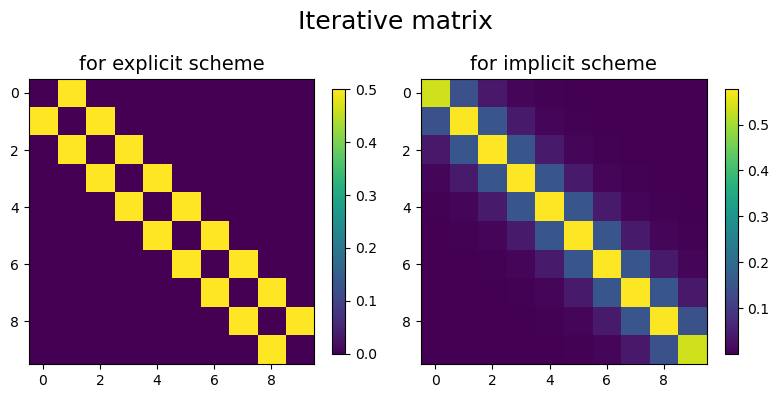

In [3]:
plt.figure(figsize=(8,4))
A = matA_explicit(10, 0.5)
plt.subplot(1,2,1)
plt.imshow(A)
plt.colorbar(shrink=0.8)
plt.title('for explicit scheme', fontsize=14)

A = matA_implicit(10, 0.5)
plt.subplot(1,2,2)
plt.imshow(A)
plt.colorbar(shrink=0.8)
plt.title('for implicit scheme', fontsize=14)

plt.suptitle('Iterative matrix', fontsize=18)
plt.tight_layout()
if savefig:
    plt.savefig('assets/matrix-visualize.pdf')

#### Verifying the stability conditions for the explicit scheme

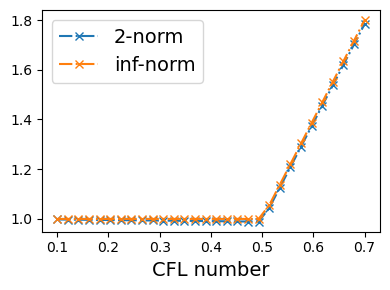

In [4]:
N = 20
c_list = np.linspace(0.1, 0.7, 30)
A_list_2_norm = np.zeros(len(c_list))
A_list_inf_norm = np.zeros(len(c_list))

for i in range(len(c_list)):
    c = c_list[i]
    A = matA_explicit(N, c)
    A_list_2_norm[i] = np.linalg.norm(A,ord=2)
    A_list_inf_norm[i] = np.linalg.norm(A,ord=np.inf)
    
plt.figure(figsize=(4,3))
plt.plot(c_list, A_list_2_norm, 'x-.', label='2-norm')
plt.plot(c_list, A_list_inf_norm, 'x-.', label='inf-norm')
plt.xlabel('CFL number',fontsize=14)
plt.legend(fontsize=14)
plt.tight_layout()
if savefig:
    plt.savefig('assets/explicit-norm.pdf')

#### Verifying the unconditional stability for the implicit scheme

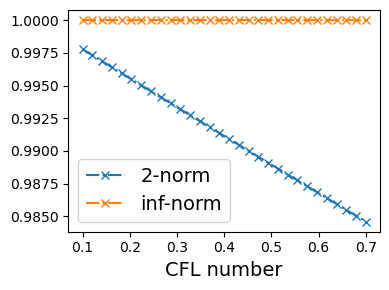

In [5]:
N = 20
c_list = np.linspace(0.1, 0.7, 30)
A_list_2_norm = np.zeros(len(c_list))
A_list_inf_norm = np.zeros(len(c_list))

for i in range(len(c_list)):
    c = c_list[i]
    A = matA_implicit(N, c)
    A_list_2_norm[i] = np.linalg.norm(A,ord=2)
    A_list_inf_norm[i] = np.linalg.norm(A,ord=np.inf)
    
plt.figure(figsize=(4,3))
plt.plot(c_list, A_list_2_norm, 'x-.', label='2-norm')
plt.plot(c_list, A_list_inf_norm, 'x-.', label='inf-norm')
plt.legend(fontsize=14)
plt.xlabel('CFL number',fontsize=14)
plt.tight_layout()
if savefig:
    plt.savefig('assets/implicit-norm.pdf')